In [22]:
# !pip install --upgrade pip
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn
# !pip install scikit-learn

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor


df = pd.read_csv('dataset/ResearchInformation3.csv')
df


,Department,Gender,HSC,SSC,Income,Hometown,Computer,Preparation,Gaming,Attendance,Job,English,Extra,Semester,Last,Overall
0,Business Administration,Male,4.17,4.84,"Low (Below 15,000)",Village,3,More than 3 Hours,0-1 Hour,80%-100%,No,3,Yes,6th,3.220,3.350
1,Business Administration,Female,4.92,5.00,"Upper middle (30,000-50,000)",City,3,0-1 Hour,0-1 Hour,80%-100%,No,3,Yes,7th,3.467,3.467
2,Business Administration,Male,5.00,4.83,"Lower middle (15,000-30,000)",Village,3,0-1 Hour,More than 3 Hours,80%-100%,No,4,Yes,3rd,4.000,3.720
3,Business Administration,Male,4.00,4.50,"High (Above 50,000)",City,5,More than 3 Hours,More than 3 Hours,80%-100%,No,5,Yes,4th,3.800,3.750
4,Business Administration,Female,2.19,3.17,"Lower middle (15,000-30,000)",Village,3,0-1 Hour,2-3 Hours,80%-100%,No,3,Yes,4th,3.940,3.940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,Public Health,Male,3.50,4.00,"Lower middle (15,000-30,000)",Village,2,More than 3 Hours,2-3 Hours,40%-59%,Yes,2,Yes,7th,3.250,3.100
489,Public Health,Male,4.50,4.00,"Upper middle (30,000-50,000)",City,4,2-3 Hours,2-3 Hours,60%-79%,No,3,Yes,9th,3.500,3.670
490,Sociology,Female,4.56,3.67,"Lower middle (15,000-30,000)",City,3,0-1 Hour,2-3 Hours,40%-59%,No,2,No,2nd,3.560,3.560
491,Sociology,Male,4.23,4.50,"Low (Below 15,000)",Village,3,More than 3 Hours,2-3 Hours,80%-100%,No,3,Yes,10th,3.610,3.750


In [24]:
# Some basic EDA
df.info()
df.describe()
df.isnull().sum()
df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Department   493 non-null    object 
 1   Gender       493 non-null    object 
 2   HSC          493 non-null    float64
 3   SSC          493 non-null    float64
 4   Income       493 non-null    object 
 5   Hometown     493 non-null    object 
 6   Computer     493 non-null    int64  
 7   Preparation  493 non-null    object 
 8   Gaming       493 non-null    object 
 9   Attendance   493 non-null    object 
 10  Job          493 non-null    object 
 11  English      493 non-null    int64  
 12  Extra        493 non-null    object 
 13  Semester     493 non-null    object 
 14  Last         493 non-null    float64
 15  Overall      493 non-null    float64
dtypes: float64(4), int64(2), object(10)
memory usage: 61.8+ KB


Department      10
Gender           2
HSC             74
SSC             67
Income          10
Hometown         2
Computer         5
Preparation      3
Gaming           3
Attendance       4
Job              2
English          5
Extra            2
Semester        11
Last           158
Overall        128
dtype: int64

<Figure size 1500x1200 with 0 Axes>

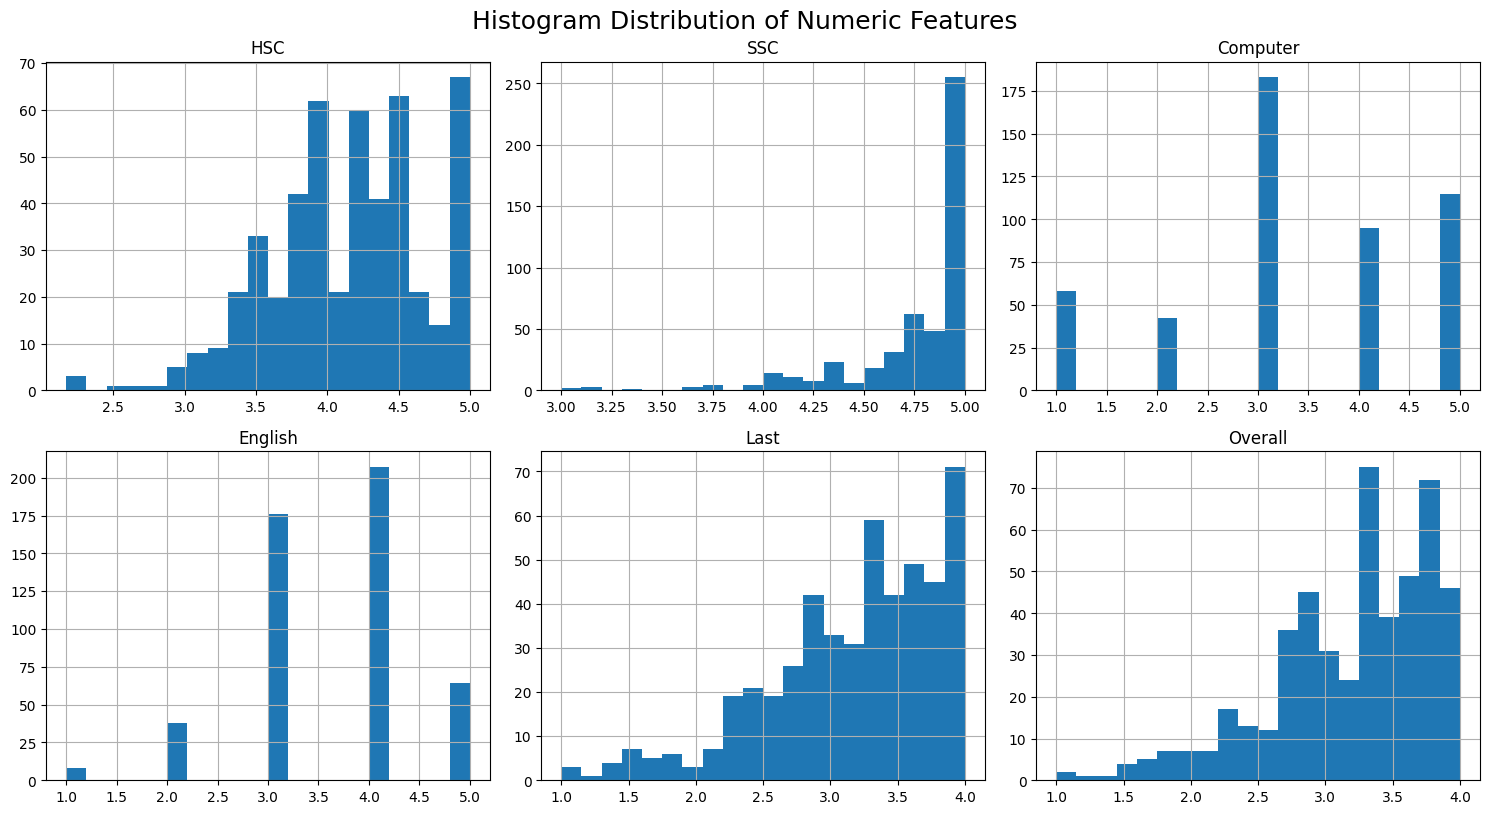

In [25]:

# Histogram Plot - Numeric Feature Distributions
numeric_cols = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(15, 12))
df[numeric_cols].hist(bins=20, figsize=(15, 12), layout=(len(numeric_cols)//3 + 1, 3))
plt.suptitle("Histogram Distribution of Numeric Features", fontsize=18)
plt.tight_layout()
plt.show()

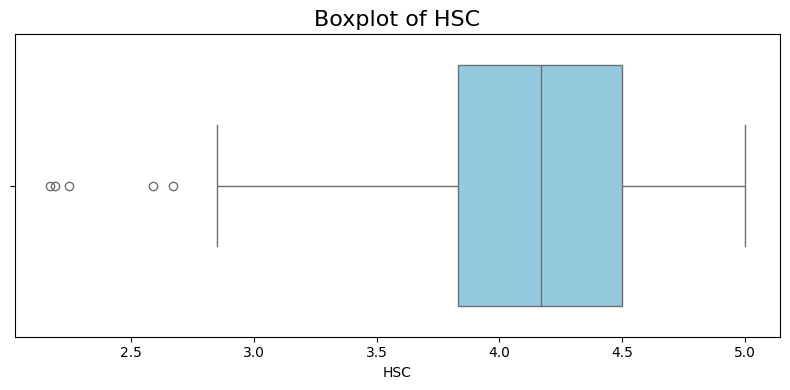

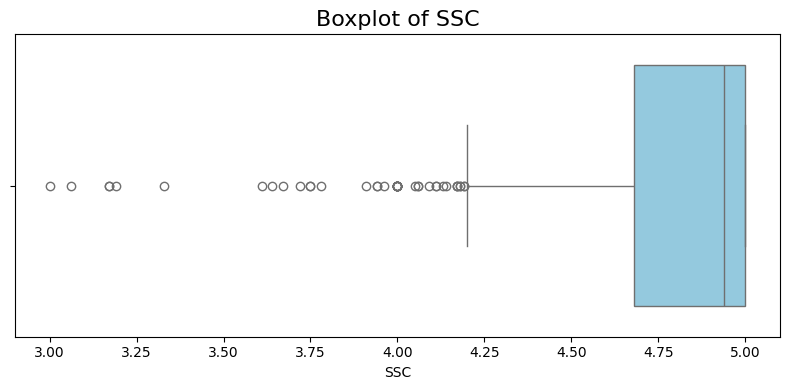

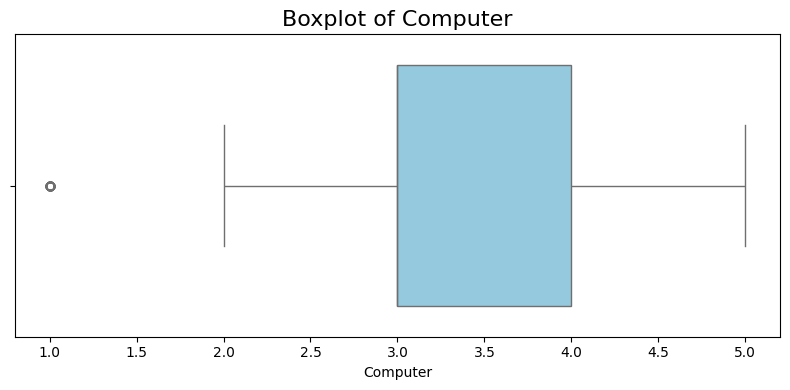

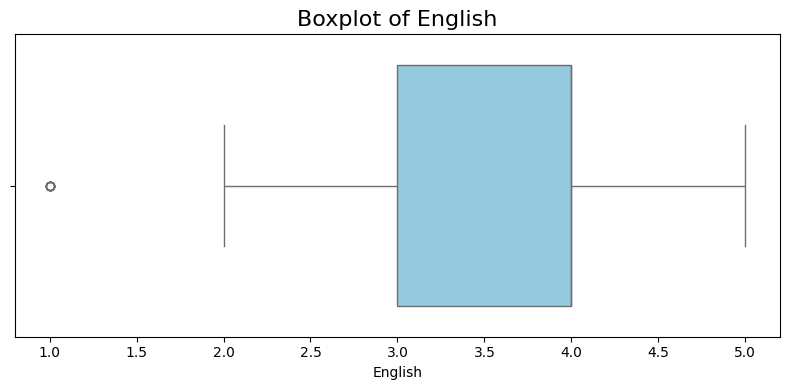

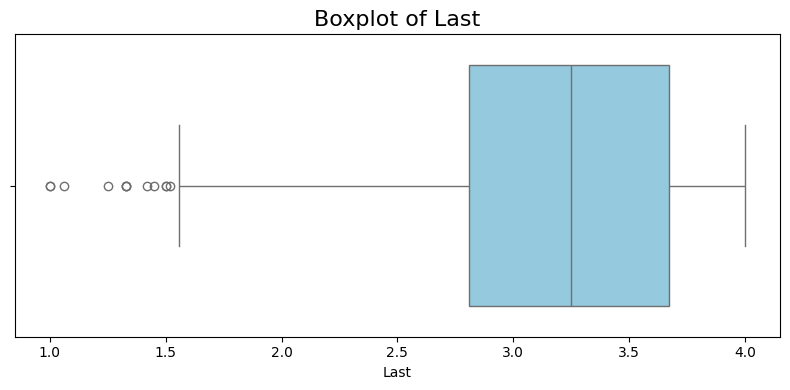

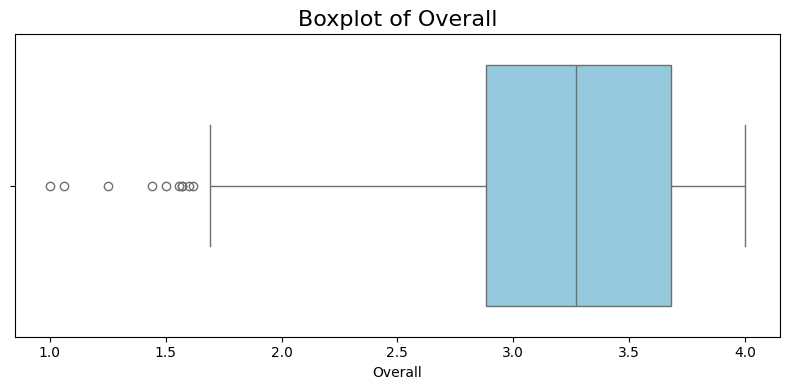

In [26]:
# Boxplot for outlier detection
numeric_cols = df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f"Boxplot of {col}", fontsize=16)
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

In [27]:
df = df[(df["Overall"] >= 0.5) & (df["Overall"] <= 4.0)]
df = df.reset_index(drop=True)

In [28]:
# This was important as some features had like 3 different values but shows 6 after one hot encoding it because of spaces
# so a good way to solve that is to
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    df[col] = df[col].astype(str).str.strip()
    df[col] = df[col].str.replace(r'\s+', ' ', regex=True)


df['Income'] = df['Income'].str.lower()

In [29]:
numeric_cols = ['HSC', 'SSC', 'Computer', 'English']

In [30]:
prep_order = ['0-1 Hour', '2-3 Hours', 'More than 3 Hours']
semester_order = ['2nd','3rd','4th','5th','6th','7th','8th','9th','10th','11th','12th']
income_order = [
    'low (below 15,000)',
    'lower middle (15,000-30,000)',
    'upper middle (30,000-50,000)',
    'high (above 50,000)'
]
gaming_order = ['0-1 Hour', '2-3 Hours', 'More than 3 Hours']
attendance_order = ['Below 40%', '40%-59%', '60%-79%', '80%-100%']

In [31]:

ordinal_cols = ['Preparation', 'Semester', 'Income', 'Gaming', 'Attendance']
ordinal_encoder = OrdinalEncoder(
    categories=[
        prep_order,
        semester_order,
        income_order,
        gaming_order,
        attendance_order
    ]
)

encoded = ordinal_encoder.fit_transform(df[ordinal_cols])
encoded_df = pd.DataFrame(encoded, columns=ordinal_cols)
df_dropped = df.drop(ordinal_cols, axis=1)
df_merged_ordinal = pd.concat([df_dropped, encoded_df], axis=1)

dept_mean = df_merged_ordinal.groupby("Department")["Overall"].mean()
df_merged_ordinal["Department"] = df_merged_ordinal["Department"].map(dept_mean)


In [32]:

nominal_cols = ['Gender', 'Hometown', 'Department', 'Job', 'Extra']

encoder = OneHotEncoder()
encoded = encoder.fit_transform(df[nominal_cols])
encoded_df = pd.DataFrame(encoded.toarray(), columns=encoder.get_feature_names_out(nominal_cols))
df_dropped = df_merged_ordinal.drop(nominal_cols, axis=1)
df_processed = pd.concat([df_dropped, encoded_df], axis=1)

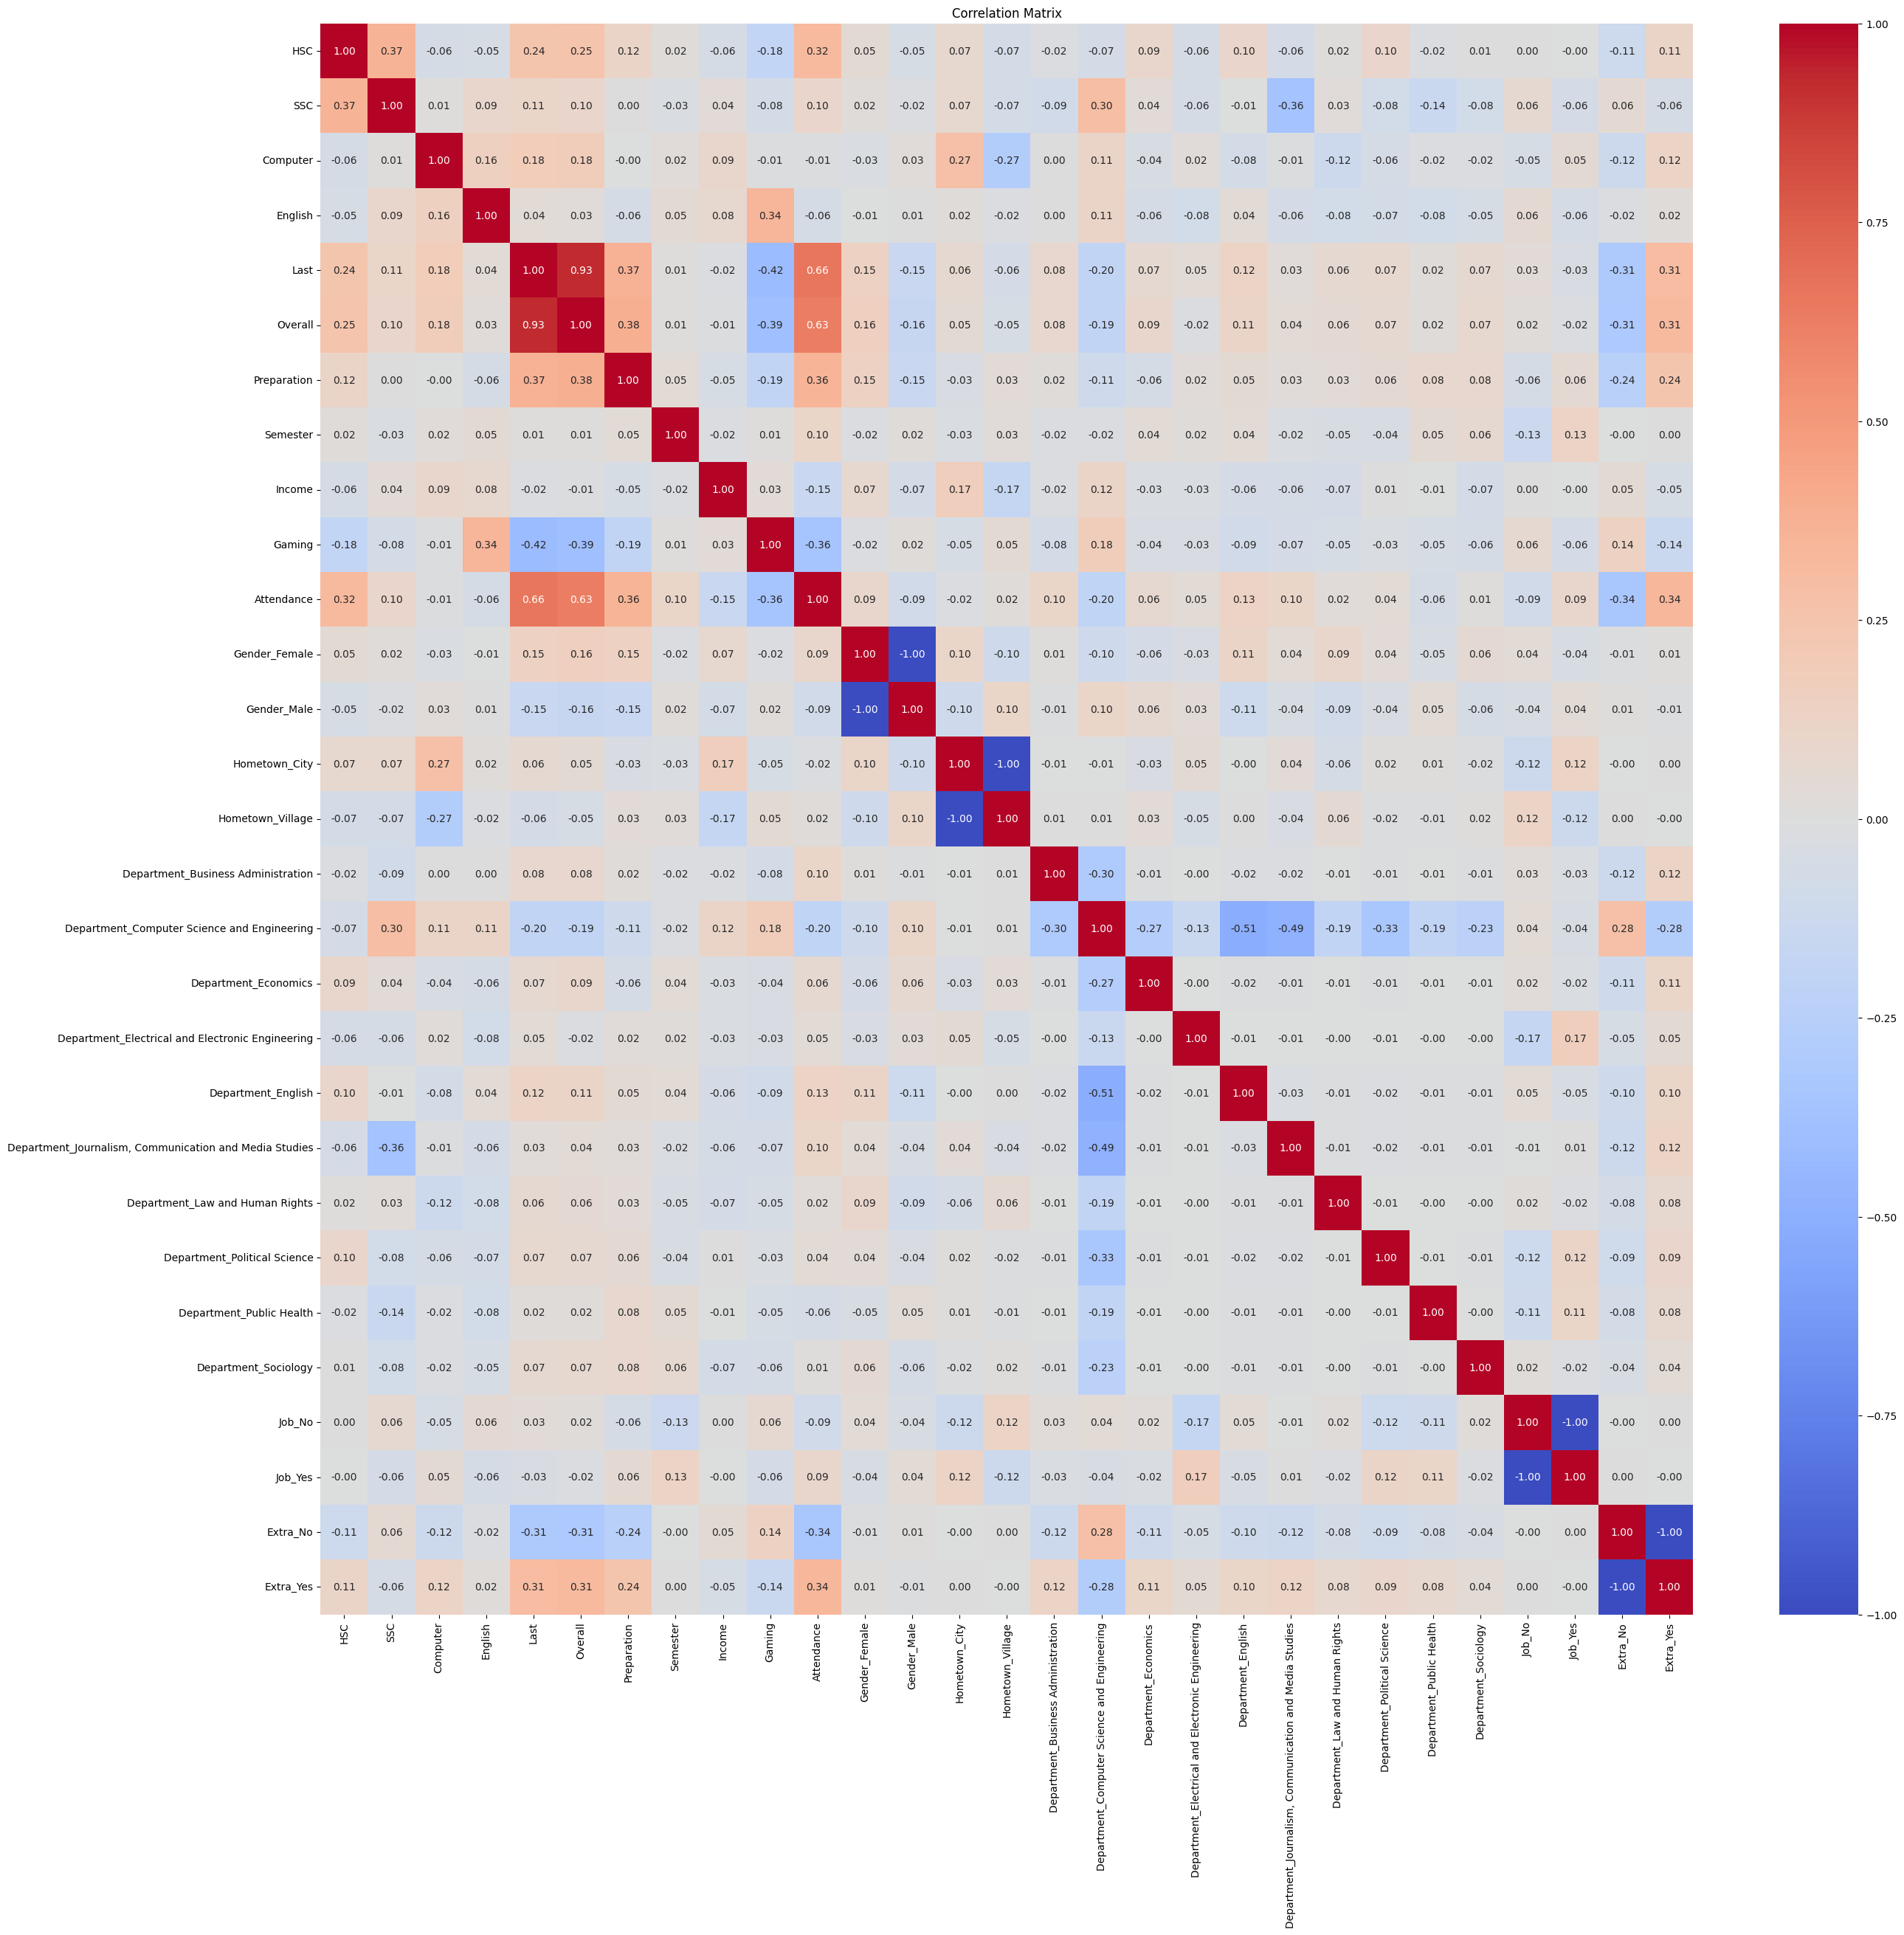

In [33]:
# 2. Compute the correlation matrix
corr = df_processed.corr(numeric_only=True)

# 3. Plot the correlation heatmap
plt.figure(figsize=(30, 28))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [34]:
target = "Overall"

# Compute correlations with target only
corr_with_target = df_processed.corr(numeric_only=True)[target].sort_values(ascending=False)
print(corr_with_target)

Overall                                                   1.000000
Last                                                      0.925076
Attendance                                                0.632471
Preparation                                               0.384053
Extra_Yes                                                 0.313666
HSC                                                       0.251960
Computer                                                  0.177536
Gender_Female                                             0.160175
Department_English                                        0.112420
SSC                                                       0.098695
Department_Economics                                      0.093184
Department_Business Administration                        0.078248
Department_Sociology                                      0.070801
Department_Political Science                              0.065390
Department_Law and Human Rights                           0.05

In [35]:
scaler = MinMaxScaler()

X = df_processed.drop('Overall', axis=1)
y = df_processed['Overall']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_scaled = scaler.fit_transform(X)

In [36]:
X = df_processed.drop('Overall', axis=1)
y = df_processed['Overall']

X_scaled = scaler.fit_transform(X)

In [37]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

model_svm = SVR(kernel='rbf', C=10, gamma='scale')
model_svm.fit(X_train, y_train)

model_dt = DecisionTreeRegressor(max_depth=6, random_state=42)
model_dt.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [38]:
def evaluate(model, name):
    y_pred = model.predict(X_test)
    print(f"---- {name} ----")
    print("R²:", r2_score(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print()

evaluate(model_lr, "Linear Regression")
evaluate(model_svm, "SVM Regression")
evaluate(model_dt, "Decision Tree Regression")

---- Linear Regression ----
R²: 0.8555086965567426
RMSE: 0.23225502539712226

---- SVM Regression ----
R²: 0.8988197638915177
RMSE: 0.19435338526940157

---- Decision Tree Regression ----
R²: 0.9196063919621078
RMSE: 0.17324273262554968



In [39]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
feature_names = X.columns

# Sort features by importance
# [::-1] reverses the order of sorted features
indices = np.argsort(importances)[::-1]

print("Feature Importances:")
for idx in indices:
    print(f"{feature_names[idx]}: {importances[idx]:.4f}")

Feature Importances:
Last: 0.9066
Semester: 0.0194
Preparation: 0.0153
SSC: 0.0090
Attendance: 0.0086
HSC: 0.0073
English: 0.0069
Computer: 0.0042
Gaming: 0.0041
Department_Electrical and Electronic Engineering: 0.0029
Income: 0.0028
Job_Yes: 0.0026
Department_Computer Science and Engineering: 0.0017
Job_No: 0.0013
Hometown_Village: 0.0011
Extra_No: 0.0011
Extra_Yes: 0.0010
Hometown_City: 0.0010
Department_Journalism, Communication and Media Studies: 0.0009
Gender_Female: 0.0009
Gender_Male: 0.0009
Department_Political Science: 0.0003
Department_English: 0.0001
Department_Economics: 0.0000
Department_Business Administration: 0.0000
Department_Sociology: 0.0000
Department_Public Health: 0.0000
Department_Law and Human Rights: 0.0000


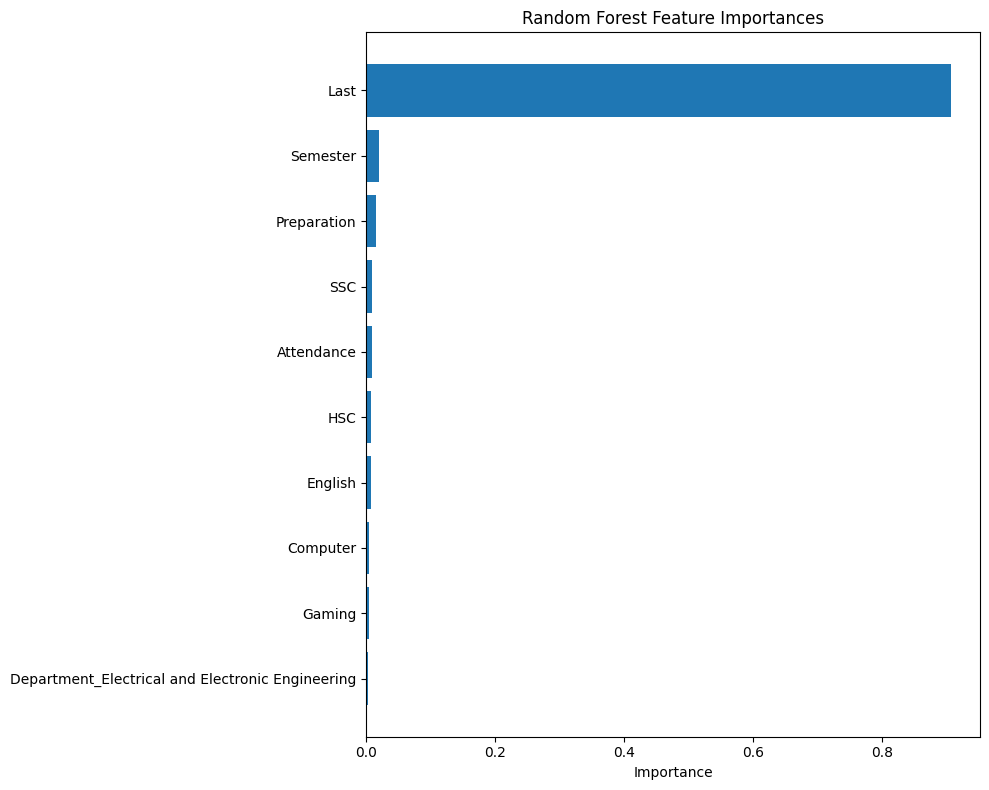

In [40]:
N = 10
top_indices = indices[:N]

plt.figure(figsize=(10, 8))
plt.barh(range(len(top_indices)), importances[top_indices][::-1])
plt.yticks(range(len(top_indices)), feature_names[top_indices][::-1])
plt.xlabel("Importance")
plt.title("Random Forest Feature Importances")
plt.tight_layout()
plt.show()

In [41]:
# 1. Define model and parameters
lr = LinearRegression()
param_grid_lr = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

# 2. Run Grid Search
grid_lr = GridSearchCV(estimator=lr, param_grid=param_grid_lr, cv=5, scoring='r2', n_jobs=-1)
grid_lr.fit(X_train, y_train)

# 3. Create a DataFrame to show ALL combinations
results_df = pd.DataFrame(grid_lr.cv_results_)
# We select the parameter columns and the mean test score (R2)
full_results = results_df[['param_fit_intercept', 'param_positive', 'mean_test_score', 'rank_test_score']]
full_results = full_results.sort_values(by='rank_test_score')

print("---- All Grid Search Combinations ----")
display(full_results) # This shows the table in Jupyter

# 4. Get the best results for the final report
best_lr = grid_lr.best_estimator_
y_pred_tuned_lr = best_lr.predict(X_test)

print("\n---- Final Tuned Model Performance (on Test Set) ----")
print(f"Best Parameters: {grid_lr.best_params_}")
print(f"Tuned R² Score: {r2_score(y_test, y_pred_tuned_lr):.4f}")
print(f"Tuned RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_tuned_lr)):.4f}")

---- All Grid Search Combinations ----


,param_fit_intercept,param_positive,mean_test_score,rank_test_score
2,False,True,0.841950,1
3,False,False,0.837109,2
1,True,False,0.836198,3
0,True,True,0.827367,4



---- Final Tuned Model Performance (on Test Set) ----
Best Parameters: {'fit_intercept': False, 'positive': True}
Tuned R² Score: 0.8649
Tuned RMSE: 0.2246


In [42]:
# 1. Define the model
dt = DecisionTreeRegressor(random_state=42)

# 2. Define the grid (Search space)
param_grid_dt = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['squared_error', 'friedman_mse']
}

# 3. Setup Grid Search
grid_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, scoring='r2', n_jobs=-1)

# 4. Train
grid_dt.fit(X_train, y_train)

# 5. Show all combinations (Top 10 for brevity)
results_dt = pd.DataFrame(grid_dt.cv_results_)
full_results_dt = results_dt[['param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf', 'mean_test_score', 'rank_test_score']]
print("---- Top 10 Decision Tree Combinations ----")
display(full_results_dt.sort_values(by='rank_test_score').head(10))

# 6. Final Performance
best_dt = grid_dt.best_estimator_
y_pred_tuned_dt = best_dt.predict(X_test)

print("\n---- Tuned Decision Tree Results ----")
print(f"Best Parameters: {grid_dt.best_params_}")
print(f"Tuned R² Score: {r2_score(y_test, y_pred_tuned_dt):.4f}")

---- Top 10 Decision Tree Combinations ----


,param_max_depth,param_min_samples_split,param_min_samples_leaf,mean_test_score,rank_test_score
41,None,10,2,0.841122,1
68,15,10,2,0.841122,1
59,10,10,2,0.840631,3
5,None,10,2,0.840458,4
32,15,10,2,0.840458,4
23,10,10,2,0.839966,6
22,10,5,2,0.837349,7
31,15,5,2,0.837136,8
4,None,5,2,0.837136,8
58,10,5,2,0.836038,10



---- Tuned Decision Tree Results ----
Best Parameters: {'criterion': 'friedman_mse', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
Tuned R² Score: 0.8847


In [43]:

# 1. Define the model
svr = SVR()

# 2. Define the grid
param_grid_svr = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.5],
    'gamma': ['scale', 'auto']
}

# 3. Setup Grid Search
grid_svr = GridSearchCV(estimator=svr, param_grid=param_grid_svr, cv=5, scoring='r2', n_jobs=-1)

# 4. Train
grid_svr.fit(X_train, y_train)

# 5. Show Top Results
results_svr = pd.DataFrame(grid_svr.cv_results_)
full_results_svr = results_svr[['param_kernel', 'param_C', 'param_epsilon', 'mean_test_score', 'rank_test_score']]

print("---- Top 10 SVR Combinations ----")
display(full_results_svr.sort_values(by='rank_test_score').head(10))

# 6. Final Performance on Test Set
best_svr = grid_svr.best_estimator_
y_pred_tuned_svr = best_svr.predict(X_test)

print("\n---- Tuned SVR Results ----")
print(f"Best Parameters: {grid_svr.best_params_}")
print(f"Tuned R² Score: {r2_score(y_test, y_pred_tuned_svr):.4f}")
print(f"Tuned RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_tuned_svr)):.4f}")

---- Top 10 SVR Combinations ----


,param_kernel,param_C,param_epsilon,mean_test_score,rank_test_score
6,linear,0.1,0.10,0.851350,1
9,linear,0.1,0.10,0.851350,1
24,linear,1.0,0.10,0.844884,3
27,linear,1.0,0.10,0.844884,3
20,rbf,1.0,0.01,0.844383,5
63,linear,100.0,0.10,0.843683,6
60,linear,100.0,0.10,0.843683,6
45,linear,10.0,0.10,0.843508,8
42,linear,10.0,0.10,0.843508,8
23,rbf,1.0,0.01,0.839850,10



---- Tuned SVR Results ----
Best Parameters: {'C': 0.1, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Tuned R² Score: 0.8962
Tuned RMSE: 0.1969
